<a href="https://colab.research.google.com/github/ththtec/Grupo7_ProjetoFinal/blob/main/An%C3%A1lis_do_Carnaval_BH_Python_%26_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚀 Análise de Vendas com SQL e Python

Este notebook realiza uma análise completa sobre uma base de dados de Carnavel 2023 de Belo Horizonte.

 Usaremos SQL para as consultas e Python (com as bibliotecas Sqlite3, Pandas, Numpy, Matplotlib.pyplot, Seaborn e Squarify) para a manipulação e visualização dos dados..

In [ ]:
#
"""Análise_Carnaval_Grupo3_7_PROJETOFINAL.ipynb

Notebook de análise dos dados do Carnaval - Grupo 3_7
"""

# Configuração inicial do ambiente
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurações de visualização
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

print("✅ Ambiente configurado!")

# Criando conexão com banco SQLite em memória
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

print(" Banco de dados SQLite criado em memória!")

✅ Ambiente configurado!
 Banco de dados SQLite criado em memória!


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tabelafinal.csv to tabelafinal.csv


In [38]:
import pandas as pd
from sqlalchemy import create_engine

# Leitura do CSV
df = pd.read_csv('tabelafinal.csv')

# Conexão com SQLite
engine = create_engine('sqlite:///tabelafinal.db')

# Envio para o banco
df.to_sql('tabelafinal', con=engine, if_exists='replace', index=False)

print("Dados carregados com sucesso!")


Dados carregados com sucesso!


In [39]:
display(pd.read_sql_query("SELECT * FROM tabelafinal LIMIT 5", engine))

,bloquinho,idade,faixaetaria,morador,ufpais,pernoitar,quantaspernoites,meiodehospedagem,transporteparacidade,mesviagem,...,genero,escolaridade,estadocivil,renda,faixarenda,rendamedia,transporteblocos,apoioLGBTQIA,fazparteLGBTQIA,data
0,BAIANAS OZADAS,61,Idoso,Morador,Minas Gerais,None,None,None,None,None,...,Feminino,Posgraduacao/ Mestrado/ Doutorado completo,Divorciado(a),Entre 3 SM e 5 SM (R$3.906 01 a R$6.51000),Entre 3 e 5 SM,5208.0,Carro de amigos ou Parentes,Sim,Nao,2023-02-20
1,HAVAYANAS USADAS,21,Jovem,Morador,Minas Gerais,None,None,None,None,None,...,Feminino,Ensino Medio completo,Solteiro(a),NR_NS,None,NaN,Onibus coletivo,Sim,Nao,2023-02-20
2,BATUQUE COLETIVO,42,Meia-idade,Morador,Minas Gerais,None,None,None,None,None,...,Feminino,Posgraduacao/ Mestrado/ Doutorado completo,Solteiro(a),Entre 3 SM e 5 SM (R$3.906 01 a R$6.51000),Entre 3 e 5 SM,5208.0,A pe,Sim,Nao,2023-02-19
3,BATUQUE COLETIVO,40,Meia-idade,Morador,Minas Gerais,None,None,None,None,None,...,Feminino,Ensino Superior completo,Casado(a),Acima de 10 SM (R$ 13.02001),Acima de 10 SM,13020.0,A pe,Sim,Nao,2023-02-19
4,BAIANAS OZADAS,28,Jovem,Morador,Minas Gerais,None,None,None,None,None,...,Masculino,Ensino Superior completo,Solteiro(a),Acima de 10 SM (R$ 13.02001),Acima de 10 SM,13020.0,Veiculo Proprio,Sim,Nao,2023-02-20


In [ ]:
# Função auxiliar para executar queries e retornar DataFrames
def executar_query(query):
    """Executa uma query SQL e retorna o resultado como um DataFrame do Pandas."""
    return pd.read_sql_query(query, engine)
print("Função 'executar_query' criada.")

Função 'executar_query' criada.


## 1. Analisando o Perfil dos Participantes

In [40]:
# Query para analisar o perfil dos participantes
query_perfil = """
SELECT
  genero,
  escolaridade,
  estadocivil,
  renda,
  COUNT(*) AS total_pessoas
FROM tabelafinal
GROUP BY genero, escolaridade, estadocivil, renda
ORDER BY total_pessoas DESC;
"""

def executar_query(query, engine):
    return pd.read_sql_query(query, engine)
display(executar_query(query_perfil, engine))

,genero,escolaridade,estadocivil,renda,total_pessoas
0,Masculino,Ensino Superior completo,Solteiro(a),Entre 3 SM e 5 SM (R$3.906 01 a R$6.51000),60
1,Feminino,Ensino Superior completo,Solteiro(a),Entre 3 SM e 5 SM (R$3.906 01 a R$6.51000),45
2,Masculino,Ensino Medio completo,Solteiro(a),Entre 1 SM e 3 SM (R$ 1.30201 a R$3.90600),45
3,Masculino,Ensino Medio completo,Solteiro(a),Entre 3 SM e 5 SM (R$3.906 01 a R$6.51000),42
4,Feminino,Ensino Medio completo,Solteiro(a),Entre 1 SM e 3 SM (R$ 1.30201 a R$3.90600),41
...,...,...,...,...,...
168,Outros,Ensino Medio completo,Solteiro(a),Entre 1 SM e 3 SM (R$ 1.30201 a R$3.90600),1
169,Outros,Ensino Superior completo,Casado(a),Entre 1 SM e 3 SM (R$ 1.30201 a R$3.90600),1
170,Outros,Ensino Superior completo,Solteiro(a),Entre 1 SM e 3 SM (R$ 1.30201 a R$3.90600),1
171,Outros,Ensino Superior completo,Viuvo(a),Entre 1 SM e 3 SM (R$ 1.30201 a R$3.90600),1


## 2. Distribuição de Moradores vs. Visitantes

In [41]:
# Distribuição de moradores
query_moradores = """
SELECT
  morador,
  COUNT(*) AS quantidade,
  ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (), 2) AS porcentagem
FROM tabelafinal
GROUP BY morador;
"""

df_moradores = executar_query(query_moradores, engine)
print("\n📍 Distribuição: Moradores vs. Visitantes")
display(df_moradores)



📍 Distribuição: Moradores vs. Visitantes


,morador,quantidade,porcentagem
0,Morador,950,84.9
1,Visitante,169,15.1


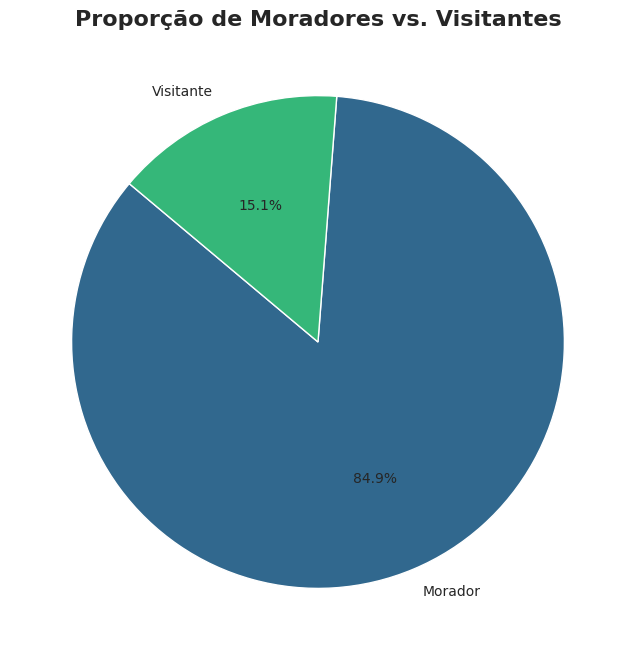

In [19]:
#Visualização da proporção entre moradores e visitantes no Carnaval BH 2023.

plt.figure(figsize=(8, 8))
plt.pie(
    df_moradores['quantidade'],
    labels=df_moradores['morador'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('viridis', len(df_moradores))
)
plt.title('Proporção de Moradores vs. Visitantes', fontsize=16, weight='bold')
plt.ylabel('')
plt.show()

## Análise 3: De Onde Vêm os Visitantes?

In [42]:
# Analisando os visitantes, de quais estados eles mais vêm?
query_visitantes_uf = """
SELECT
  ufpais,
  COUNT(*) AS total_visitantes
FROM tabelafinal
WHERE morador = 'Não'
GROUP BY ufpais
ORDER BY total_visitantes DESC;

"""
# CORREÇÃO: Passando o 'engine' para a função
df_visitantes_uf = executar_query(query_visitantes_uf, engine)
print("\n Origem dos Visitantes (Top 15 Estados)")
display(df_visitantes_uf.head(15))


 Origem dos Visitantes (Top 15 Estados)


,ufpais,total_visitantes


In [22]:
print(df.columns)
print(df['ufpais'].isnull().sum())

Index(['bloquinho', 'idade', 'faixaetaria', 'morador', 'ufpais', 'pernoitar', 'quantaspernoites', 'meiodehospedagem', 'transporteparacidade', 'mesviagem', 'fonteinfocarnaval', 'gastohospedagem', 'faixagastohospedagem', 'gastoatrativos', 'faixagastoatrativos', 'gastoalimentacao', 'faixagastoalimentacao', 'gastotransporte', 'faixagastotransporte', 'gastofatansias', 'faixagastofatansias', 'gastocompras', 'faixagastocompras', 'gastoingressos', 'faixagastoingressos', 'gastooutros', 'faixagastooutros', 'gastototal', 'faixagastototal', 'pessoasnogasto', 'gastopercapto', 'faixagastopercapto', 'diascarnaval', 'gastomediodiario', 'faixagastomediodiario', 'gastomediodiariopercapto', 'faixagastomediodiariopercapto', 'infocarnaval', 'opiniaocarnaval', 'pioroupq', 'expectativascarnaval', 'avaliacaogeral', 'banheiros', 'seguranca', 'precos', 'voltarcarnaval', 'alemdosblocos', 'patrocinador', 'genero', 'escolaridade', 'estadocivil', 'renda', 'faixarenda', 'rendamedia', 'transporteblocos',
       'apoi

,ufpais,total_visitantes
